# Spam Classification using LSTM(RNN)

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
from sklearn.model_selection import train_test_split
pd.set_option('display.max_colwidth', 1000)

messages = pd.read_csv('spam.csv', encoding='latin-1')
messages = messages.drop(labels = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)
messages.columns = ["label", "text"]
labels = np.where(messages['label']=='spam', 1, 0)

X_train, X_test, y_train, y_test = train_test_split(messages['text'],
                                                    labels, test_size=0.2)

messages.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [3]:
def remove_punctuation(text):
    import string
    text = "".join([char for char in text if char not in string.punctuation])
    return text

In [4]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [5]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [6]:
print(X_train)

2612                                                                                                                                   Yes. It's all innocent fun. O:-)
4013                                                                                                      Sorry, I can't text &amp; drive coherently, see you in twenty
3822    Please protect yourself from e-threats. SIB never asks for sensitive information like Passwords,ATM/SMS PIN thru email. Never share your password with anybody.
1138                                                                                                                                                  What * u wearing?
3809                                                                                                                                Aight, can you text me the address?
                                                                                     ...                                                                        

In [7]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [8]:
X_train_seq_padded = pad_sequences(X_train_seq, 50)
X_test_seq_padded = pad_sequences(X_test_seq, 50)

In [9]:
X_train_seq[0]

[153, 142, 51, 2555, 474, 668]

In [10]:
from keras.layers import Dense, Embedding, LSTM
from keras.models import Sequential

In [11]:
model = Sequential()

model.add(Embedding(len(tokenizer.index_word)+1, 32))
model.add(LSTM(32))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          254112    
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense (Dense)                (None, 32)                1056      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 263,521
Trainable params: 263,521
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [13]:
history = model.fit(X_train_seq_padded, y_train, 
                    batch_size=32, epochs=10,
                    validation_data=(X_test_seq_padded, y_test))

Epoch 1/10
140/140 [==============================] - 21s 17ms/step - loss: 0.4138 - accuracy: 0.8765 - val_loss: 0.0692 - val_accuracy: 0.9830
Epoch 2/10
140/140 [==============================] - 2s 13ms/step - loss: 0.0418 - accuracy: 0.9880 - val_loss: 0.0491 - val_accuracy: 0.9883
Epoch 3/10
140/140 [==============================] - 2s 13ms/step - loss: 0.0130 - accuracy: 0.9972 - val_loss: 0.0586 - val_accuracy: 0.9874
Epoch 4/10
140/140 [==============================] - 2s 13ms/step - loss: 0.0025 - accuracy: 0.9994 - val_loss: 0.0581 - val_accuracy: 0.9830
Epoch 5/10
140/140 [==============================] - 2s 13ms/step - loss: 0.0014 - accuracy: 0.9998 - val_loss: 0.0691 - val_accuracy: 0.9848
Epoch 6/10
140/140 [==============================] - 2s 13ms/step - loss: 7.8048e-04 - accuracy: 0.9999 - val_loss: 0.0752 - val_accuracy: 0.9830
Epoch 7/10
140/140 [==============================] - 2s 13ms/step - loss: 2.9374e-04 - accuracy: 1.0000 - val_loss: 0.0838 - val_accurac

Text(0.5, 0, 'epoch')

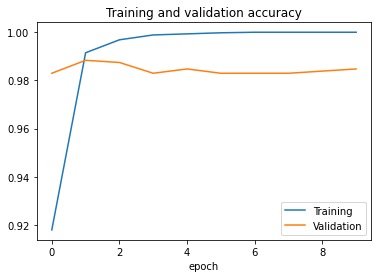

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')